In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs

In [2]:
ckd_data = pd.read_csv('kidney_disease_orig.csv')
ckd_data.shape

(400, 26)

In [3]:
# Data Preprocessing
ckd_data[['htn','dm','cad','pe','ane']] = ckd_data[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
ckd_data[['rbc','pc']] = ckd_data[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
ckd_data[['pcc','ba']] = ckd_data[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
ckd_data[['appet']] = ckd_data[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
ckd_data['classification'] = ckd_data['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
ckd_data.rename(columns={'classification':'class'},inplace=True)


In [4]:
# Further cleaning [Replacing Good/Bad and Yes/No with 0/1]
ckd_data['pe'] = ckd_data['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
ckd_data['appet'] = ckd_data['appet'].replace(to_replace='no',value=0)
ckd_data['cad'] = ckd_data['cad'].replace(to_replace='\tno',value=0)
ckd_data['dm'] = ckd_data['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
ckd_data.drop('id',axis=1,inplace=True)


In [5]:
ckd_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1,0,0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1,0,0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0,0,1,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0,1,1,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1,0,0,1.0


In [6]:
#Drop sample with NaN data(i.e with no values)
ckd_data = ckd_data.dropna(axis=0)
ckd_data['class'].value_counts()
ckd_data.shape

(169, 25)

In [7]:
ckd_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0,1,1,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29,12100,3.7,1.0,1.0,0.0,0,0,1,1.0
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,32,4500,3.8,1.0,1.0,0.0,0,1,0,1.0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16,11000,2.6,1.0,1.0,1.0,0,1,0,1.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24,9200,3.2,1.0,1.0,1.0,0,1,1,1.0


In [8]:
X = ckd_data.drop('class', axis=1)
y = ckd_data['class']

In [9]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,32,6700,3.9,1.0,0.0,0.0,0,1,1
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,9.5,29,12100,3.7,1.0,1.0,0.0,0,0,1
11,63.0,70.0,1.010,3.0,0.0,1.0,1.0,1.0,0.0,380.0,...,10.8,32,4500,3.8,1.0,1.0,0.0,0,1,0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,5.6,16,11000,2.6,1.0,1.0,1.0,0,1,0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,7.7,24,9200,3.2,1.0,1.0,1.0,0,1,1


In [10]:
# Split dataset in order to train and test on different data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [20]:
# Call SVM using scikit-learn and train the model on the train data
from sklearn.svm import SVC  
svclassifier = SVC(kernel = 'linear',C = 0.5,gamma = 0.001)  
svclassifier.fit(X_train, y_train) 

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

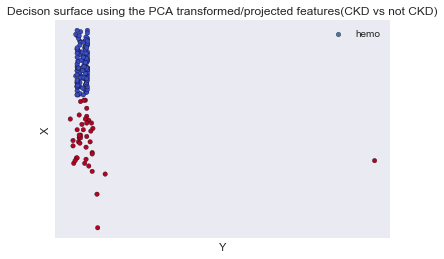

In [21]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Plotting only 2 features for visualization
fig, ax = plt.subplots()
# Set-up grid for plotting.
X0, X1 = X.iloc[:, 13], X.iloc[: ,14]
xx, yy = make_meshgrid(X0, X1)

#plot_contours(ax, svclassifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('X')
ax.set_xlabel('Y')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using the PCA transformed/projected features(CKD vs not CKD)')
ax.legend()
plt.show()

In [22]:
# do prediction on the test data
y_pred = svclassifier.predict(X_test) 
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [23]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[31  0]
 [ 0  3]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

